使用python 实现线性回归算法。
向量运算使用numpy

核心数学公式
<img src="./images/functions.PNG" />


In [1]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
        

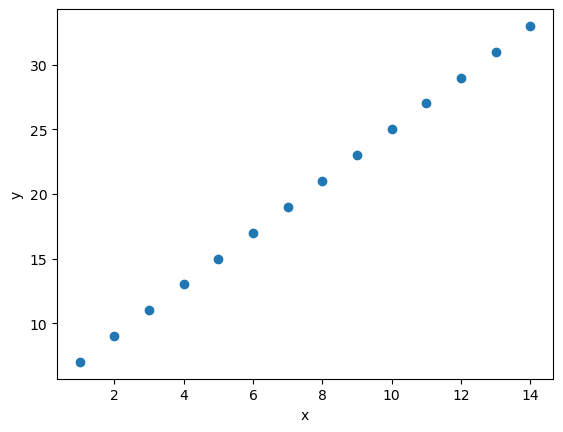

In [3]:
#load data
import pandas as pd
data=pd.read_csv('data/generated_data.csv')
# 数据赋值
x=data.loc[:,'x']
y=data.loc[:,'y']

# 画图
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
model = LinearRegression()
x = np.array(x).reshape(-1, 1)
model.fit(x,y)

In [9]:
y_pred = model.predict(x)

# 计算R^2
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print("R^2:", r2)

R^2: 0.9990856082792057


预测值为： [11.67207474]


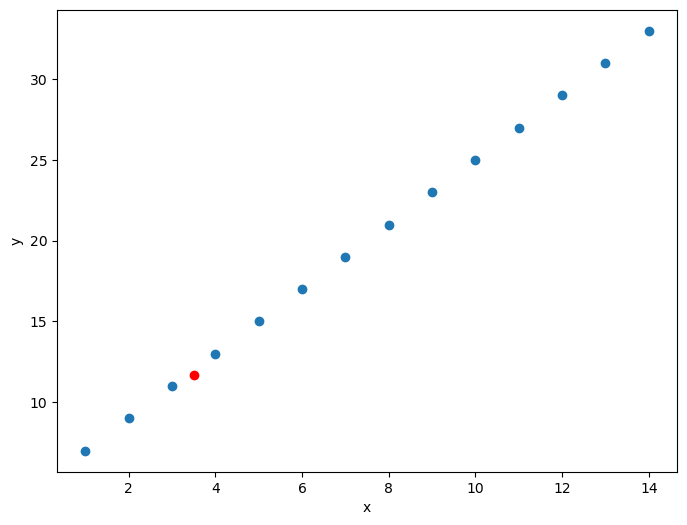

In [10]:
# 预测x = 3.5
y_pred = model.predict(np.array([3.5]).reshape(1, -1))
print("预测值为：", y_pred)

fig1 = plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(3.5, y_pred, 'ro')
plt.show()